# FB Prophet

In [115]:
import pandas as pd
from fbprophet import Prophet

In [122]:
df = pd.read_pickle('../dataset/preprocessed/284_imputed.pkl')

In [123]:
df = df[df['LeadTime']==0]
df['occ']   = df['Reservations']/df['TotalCapacity']
df['ds']    = df['DOA']
df['cap']   = df['occ'].max()
df['floor'] = 0.0
df = df.rename(columns={'occ':'y'})

In [124]:
train = df[df['ds']<='2019-09-30']
test  = df[df['ds']>'2019-09-30']

In [125]:
m = Prophet(daily_seasonality=False,
            weekly_seasonality=False,
            yearly_seasonality=False,
            growth='logistic'
            ).add_seasonality(
                name='monthly',
                period=30.5,
                fourier_order=12
            ).add_seasonality(
                name='weekly',
                period=7,
                fourier_order=20
            ).add_seasonality(
                name='yearly',
                period=365.25,
                fourier_order=20
            ).add_seasonality(
                name='quarterly',
                period=365.25/4,
                fourier_order=5,
                prior_scale=15
            )
m.fit(train)

In [126]:
future = m.make_future_dataframe(periods=93)
future['cap'] = 1.0
future['floor'] = 0.0

In [127]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
702,2019-12-28,1.022148,0.940879,1.095432
703,2019-12-29,0.895186,0.812437,0.982450
704,2019-12-30,0.962525,0.878420,1.048101
705,2019-12-31,0.965993,0.887644,1.046925
706,2020-01-01,0.938613,0.860165,1.015749


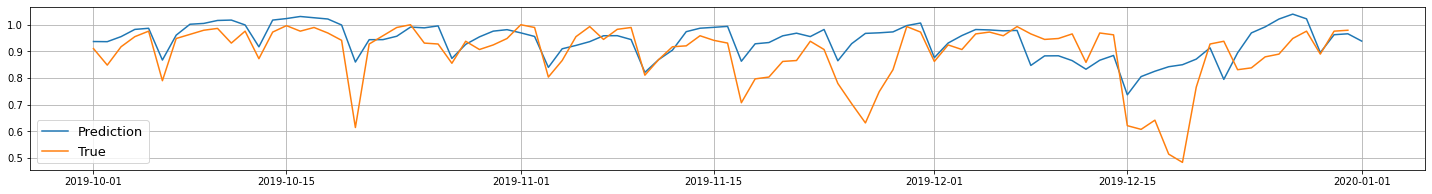

In [128]:
plt.figure(figsize=(25, 3))
plt.plot(forecast.tail(93).ds,forecast.tail(93).yhat, label='Prediction')
plt.plot(test.ds,test.y, label='True')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='best', fontsize=13)
plt.show()

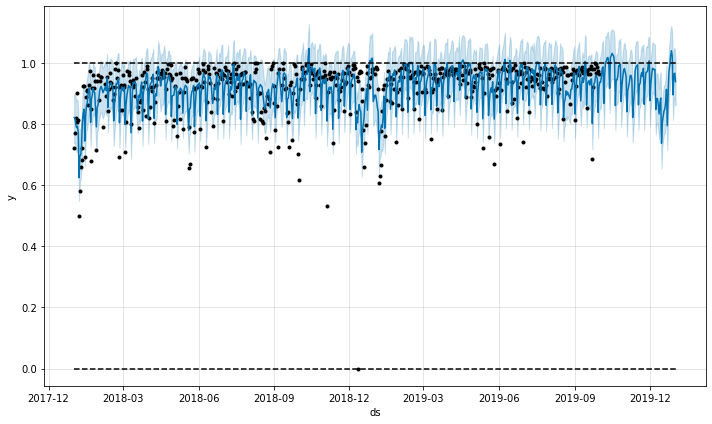

In [130]:
fig1 = m.plot(forecast)

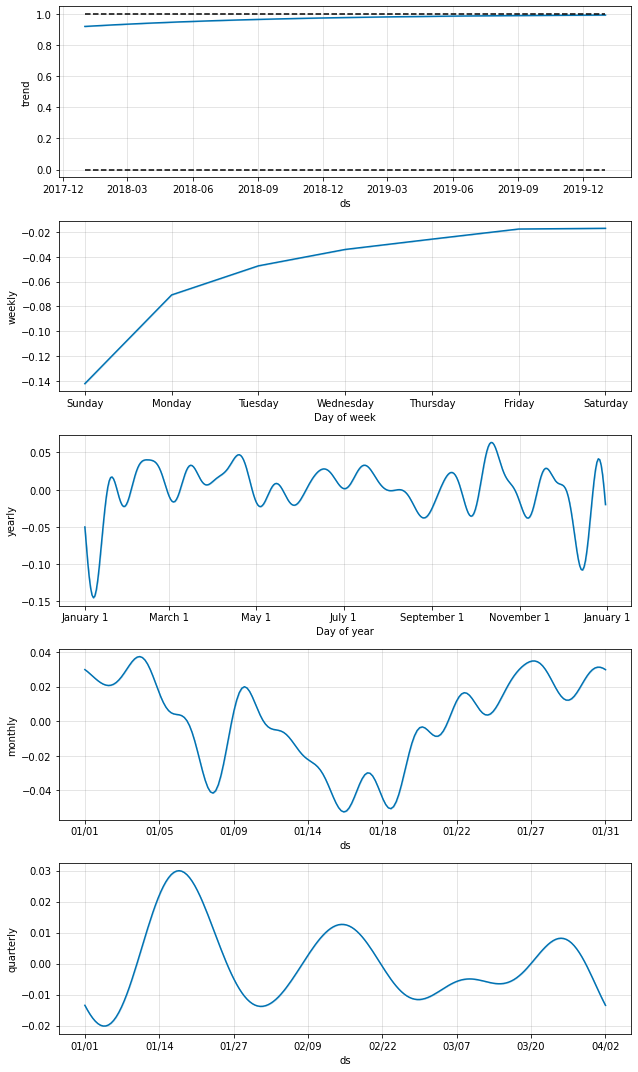

In [129]:
fig2 = m.plot_components(forecast)